<a href="https://colab.research.google.com/github/Oukey/M_L/blob/master/myHW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение задания по занятию №4

Импорт необходимых пакетов

In [0]:
import torch
import numpy as np
import pandas as pd
import random
from torch import nn, optim
from torch.nn import Linear, Sigmoid
from matplotlib import pyplot as plt

Построение графика на основании модели

In [0]:
def set_default(figsize=(10, 10)):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize)


def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
#     plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap='rainbow')
    plt.axis('square')
    plt.axis(np.array((-15, 15, -15, 15)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-15, 15, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.2)
    plot_data(X, y)


def show_scatterplot(X, colors, title=''):
    colors = colors.cpu().numpy()
    X = X.cpu().numpy()
    plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    # plt.grid(True)
    plt.title(title)
    plt.axis('off')


def plot_bases(bases, width=0.04):
    bases = bases.cpu()
    bases[2:] -= bases[:2]
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)


def show_mat(mat, vect, prod, threshold=-1):
    # Subplot grid definition
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=True,
                                        gridspec_kw={'width_ratios':[5,1,1]})
    # Plot matrices
    cax1 = ax1.matshow(mat.numpy(), clim=(-1, 1))
    ax2.matshow(vect.numpy(), clim=(-1, 1))
    cax3 = ax3.matshow(prod.numpy(), clim=(threshold, 1))

    # Set titles
    ax1.set_title(f'A: {mat.size(0)} \u00D7 {mat.size(1)}')
    ax2.set_title(f'a^(i): {vect.numel()}')
    ax3.set_title(f'p: {prod.numel()}')

    # Plot colourbars
    fig.colorbar(cax1, ax=ax2)
    fig.colorbar(cax3, ax=ax3)

    # Fix y-axis limits
    ax1.set_ylim(bottom=max(len(prod), len(vect)) - 0.5)
    
    
# Инициализация графика
set_default()

Функция "шаг_обучения"

In [0]:
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

Гипер-параметры

In [0]:
seed = 42
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # количество точек на признак
D = 2  # размерность данных (плоскость)
C = 5  # количество признаков
H = 100  # количество нейронов в скрытом слое
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Генерация датасета

In [607]:
X, y = make_blobs(n_samples=N, centers=C, cluster_std=1.5, n_features=D)


X = torch.from_numpy(X).float()
y = torch.from_numpy(y)
print(X.data.shape, y.data.shape)

torch.Size([1000, 2]) torch.Size([1000])


Визуализация графика сгенерированных данных

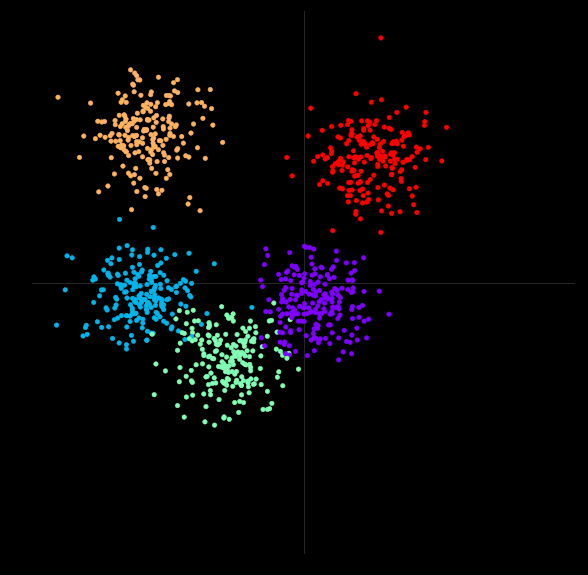

In [608]:
plot_data(X, y)

Обучение модели

In [609]:
model = torch.nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C))
model.to(device)

weight_decay = 0.0000001
lr = 0.1
n_epochs = 1000
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
   loss = train_step(X, y)
    
print('Loss:', loss)
print(model)

Loss: 0.03204093500971794
Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=5, bias=True)
)


Визуализация графика с результатом обучения

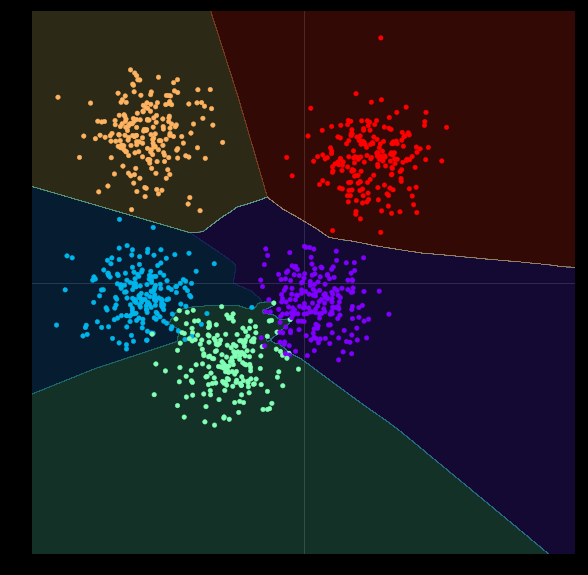

In [610]:
plot_model(X, y, model)